TUT viết class obj trong python

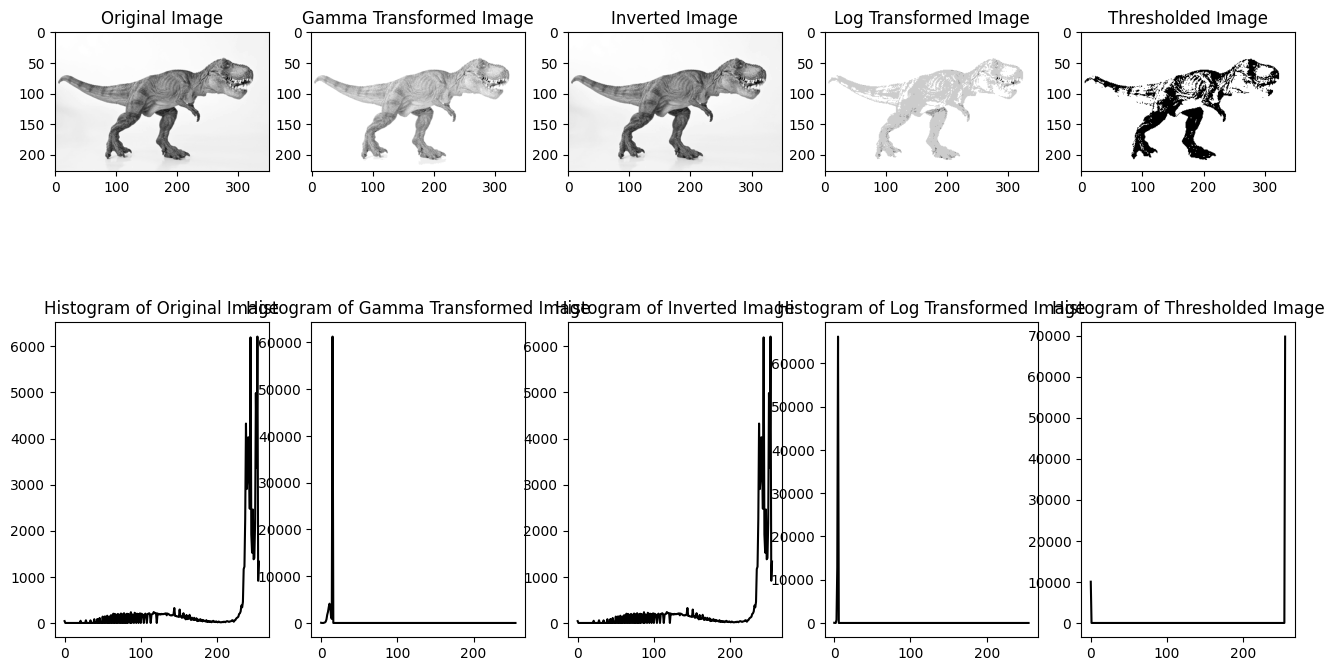

In [1]:
#negalogagamathreshold
import matplotlib.pyplot as plt
import cv2
class image_transform():
    ''' lớp biến đổi ảnh cơ bản'''
    def __init__(self,img) -> None:
        '''khởi tạo ảnh đầu vào cho lớp'''
        self.img=img
    def select_transform(self,name:str, **kwargs):
        '''Truyền vào tên phương pháp biến đổi ảnh:
            - negative
            - gamma
            - log
            - threshold
        '''
        if name=='negative':
            return self.image_negative()
        elif name=='gamma':
            return self.gamma_transform(**kwargs)
        elif name=='loga':
            return self.log_transform()
        elif name=='threshold':
            return self.thresholding_binary(**kwargs)
        else: 
            return self.img
# hàm biến đổi ảnh
    def image_negative(self):
        return 255-self.img
        
    def gamma_transform(self, gamma:float, c=1):
        return float(c)*pow(self.img,gamma)
    
    def log_transform(self,c=1):
        return c*cv2.log(self.img+1.0)
    
    def thresholding_binary(self,m:int): 
        _, thresh_img = cv2.threshold(self.img, m, 255, cv2.THRESH_BINARY)
        return thresh_img.astype(int)  # Chuyển đổi sang kiểu số nguyên
if __name__=="__main__":
    img=cv2.imread('D:/trex.png',0)
    fig=plt.figure(figsize=(16,9))
    ax=fig.subplots(2,5)
     # Hiển thị ảnh gốc và histogram của ảnh gốc
    ax[0,0].imshow(img, cmap='gray')
    ax[0,0].set_title("Original Image")
    
    # Tạo histogram của ảnh gốc
    hist = cv2.calcHist([img], [0], None, [256], [0,256])
    ax[1,0].plot(hist, color='k')
    ax[1,0].set_title("Histogram of Original Image")
    
    # Biến đổi gamma
    gamma_value = 0.5  # Giá trị gamma, bạn có thể thay đổi giá trị này
    gamma_img = image_transform(img).select_transform('gamma', gamma=gamma_value)
    gamma_img = gamma_img.astype('uint8')  # Chuyển đổi về định dạng uint8
    ax[0,1].imshow(gamma_img, cmap='gray')
    ax[0,1].set_title("Gamma Transformed Image")
    
    # Tạo histogram của ảnh biến đổi gamma
    hist_gamma = cv2.calcHist([gamma_img], [0], None, [256], [0,256])
    ax[1,1].plot(hist_gamma, color='k')
    ax[1,1].set_title("Histogram of Gamma Transformed Image")
    
    # Đảo ảnh
    inverted_img = image_transform(img).select_transform('invert')
    inverted_img = inverted_img.astype('uint8')  # Chuyển đổi về định dạng uint8
    ax[0,2].imshow(inverted_img, cmap='gray')
    ax[0,2].set_title("Inverted Image")
    
    # Tạo histogram của ảnh đảo
    hist_inverted = cv2.calcHist([inverted_img], [0], None, [256], [0,256])
    ax[1,2].plot(hist_inverted, color='k')
    ax[1,2].set_title("Histogram of Inverted Image")
    
    # Biến đổi logarit
    log_img = image_transform(img).select_transform('loga')
    log_img = log_img.astype('uint8')  # Chuyển đổi về định dạng uint8
    ax[0,3].imshow(log_img, cmap='gray')
    ax[0,3].set_title("Log Transformed Image")
    
    # Tạo histogram của ảnh biến đổi logarit
    hist_log = cv2.calcHist([log_img], [0], None, [256], [0,256])
    ax[1,3].plot(hist_log, color='k')
    ax[1,3].set_title("Histogram of Log Transformed Image")
    
    # Biến đổi Threshold
    threshold_value = 128  # Giá trị ngưỡng, bạn có thể thay đổi giá trị này
    threshold_img = image_transform(img).select_transform('threshold', m=threshold_value)
    threshold_img = threshold_img.astype('uint8')  # Chuyển đổi về định dạng uint8
    ax[0,4].imshow(threshold_img, cmap='gray')
    ax[0,4].set_title("Thresholded Image")
    
    # Tạo histogram của ảnh biến đổi threshold
    hist_threshold = cv2.calcHist([threshold_img], [0], None, [256], [0,256])
    ax[1,4].plot(hist_threshold, color='k')
    ax[1,4].set_title("Histogram of Thresholded Image")
    plt.show()